In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

changing th edirectory

In [2]:
%cd D:\PG Diploma Upgrad\My Project\Students performance in exam

D:\PG Diploma Upgrad\My Project\Students performance in exam


In [3]:
df=pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


checking if all values are standerised

In [7]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print()

gender
female    518
male      482
Name: gender, dtype: int64

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

lunch
standard        645
free/reduced    355
Name: lunch, dtype: int64

test preparation course
none         642
completed    358
Name: test preparation course, dtype: int64

math score
65    36
62    35
59    32
69    32
73    27
      ..
22     1
19     1
18     1
8      1
0      1
Name: math score, Length: 81, dtype: int64

reading score
72    34
74    33
64    32
73    30
67    30
      ..
32     1
28     1
26     1
23     1
17     1
Name: reading score, Length: 72, dtype: int64

writing score
74    35
70    33
68    31
73    28
62    27
      ..
23     1
22     1
19

In [8]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

**all the data seems to be standerised**

In [9]:
int_columns=['math score','writing score','reading score']

In [10]:
px.box(df,y=int_columns)

**Binning the test scores**

In [11]:
for i in int_columns:
    df[i+' range']=pd.cut(df[i],bins=[0,20,40,60,80,100],labels=['Very-poor','poor','Average','good','Excellent'])

In [12]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score range,writing score range,reading score range
0,female,group B,bachelor's degree,standard,none,72,72,74,good,good,good
1,female,group C,some college,standard,completed,69,90,88,good,Excellent,Excellent
2,female,group B,master's degree,standard,none,90,95,93,Excellent,Excellent,Excellent
3,male,group A,associate's degree,free/reduced,none,47,57,44,Average,Average,Average
4,male,group C,some college,standard,none,76,78,75,good,good,good
5,female,group B,associate's degree,standard,none,71,83,78,good,good,Excellent
6,female,group B,some college,standard,completed,88,95,92,Excellent,Excellent,Excellent
7,male,group B,some college,free/reduced,none,40,43,39,poor,poor,Average
8,male,group D,high school,free/reduced,completed,64,64,67,good,good,good
9,female,group B,high school,free/reduced,none,38,60,50,poor,Average,Average


 **ANALYSIS**

In [13]:
a=df['test preparation course'].value_counts()
px.pie(values=a.values,names=a.index,hole=0.5)


**comparing the count in score range**

In [14]:
x=df[['math score range','writing score range','reading score range']]

In [15]:
px.bar(x.head(250),barmode='group')

In [16]:
px.bar(x,barmode='group',facet_col=df['gender'])

In [17]:
px.bar(x.head(100),barmode='stack',facet_col=df['test preparation course'].head(100))

pairplots

**checking for the relatin between columns with dtype as integer**

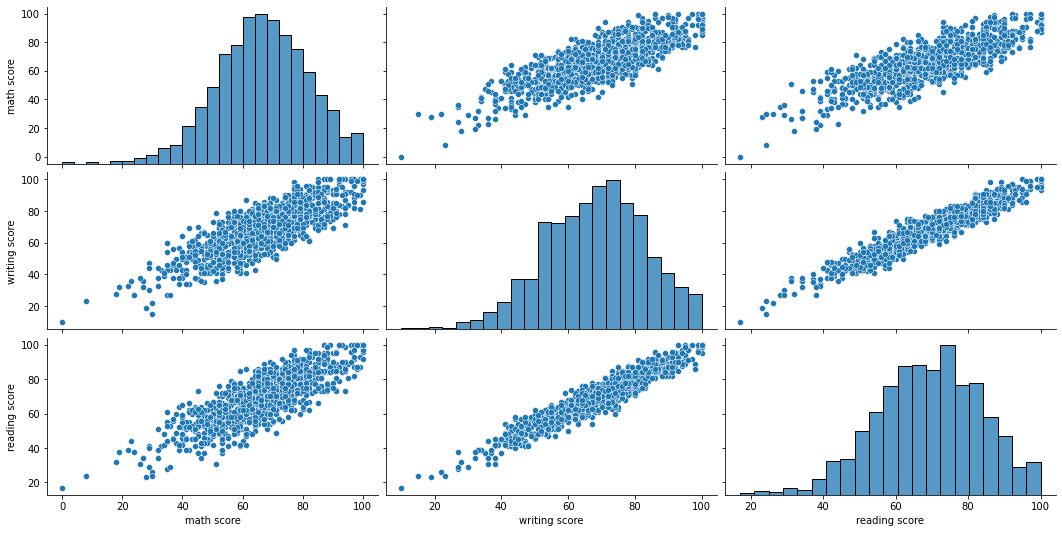

In [18]:
sns.pairplot(df,vars=['math score','writing score','reading score'],aspect=2,height=2.5)
plt.show()

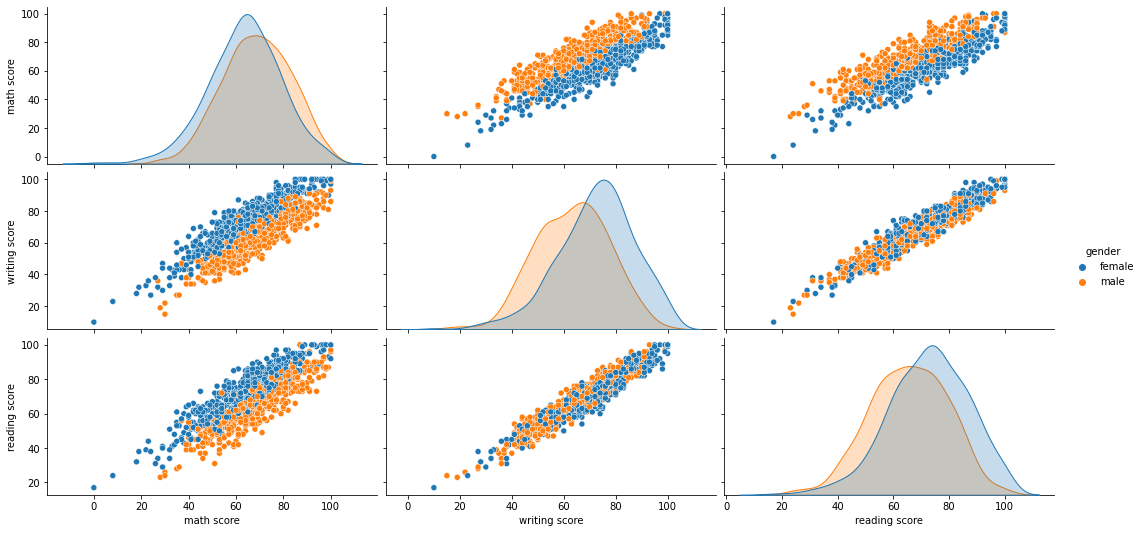

In [19]:
sns.pairplot(df,vars=['math score','writing score','reading score'],aspect=2,height=2.5,hue='gender')
plt.show()

**checking the relation between the gender and education of parent's**

In [20]:
px.bar(df,x='parental level of education',facet_col='gender',color='gender')

**checking the realation between parental level of education and race race/ethnivity**

In [21]:
fig=px.bar(df,x='parental level of education',facet_col='race/ethnicity',color='race/ethnicity')
fig.update_xaxes(title="Parent's Education")
fig.show()


**checking if lunch has any effects on th escoring of the students**

In [22]:
px.bar(x.head(200),barmode='group',facet_col=df['lunch'].head(200))

In [23]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score range,writing score range,reading score range
0,female,group B,bachelor's degree,standard,none,72,72,74,good,good,good
1,female,group C,some college,standard,completed,69,90,88,good,Excellent,Excellent
2,female,group B,master's degree,standard,none,90,95,93,Excellent,Excellent,Excellent
3,male,group A,associate's degree,free/reduced,none,47,57,44,Average,Average,Average
4,male,group C,some college,standard,none,76,78,75,good,good,good


**